In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seoul_temp = pd.read_csv('seoul_temp_1904_2021.csv', encoding='cp949')
seoul_temp

,년도,지점,평균기온,최저기온,최고기온
0,1907,108,NaN,-20.1,25.4
1,1908,108,10.4,-15.8,33.6
2,1909,108,10.6,-14.6,35.6
3,1910,108,10.3,-19.9,33.3
4,1911,108,10.6,-21.5,34.5
...,...,...,...,...,...
110,2017,108,13.0,-12.6,35.4
111,2018,108,12.9,-17.8,39.6
112,2019,108,13.5,-10.9,36.8
113,2020,108,13.2,-12.9,35.4


In [3]:
seoul_temp.describe()

,년도,지점,평균기온,최저기온,최고기온
count,115.000000,115.0,110.000000,113.000000,113.000000
mean,1964.000000,108.0,11.723636,-16.448673,34.819469
std,33.341666,0.0,1.000819,3.111933,2.496600
min,1907.000000,108.0,9.600000,-23.100000,16.200000
25%,1935.500000,108.0,10.900000,-18.600000,34.000000
50%,1964.000000,108.0,11.650000,-16.800000,35.100000
75%,1992.500000,108.0,12.475000,-14.100000,36.000000
max,2021.000000,108.0,13.800000,-8.600000,39.600000


In [4]:
seoul_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      115 non-null    int64  
 1   지점      115 non-null    int64  
 2   평균기온    110 non-null    float64
 3   최저기온    113 non-null    float64
 4   최고기온    113 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.6 KB


In [5]:
print(seoul_temp.isnull().sum())
print()

print(seoul_temp[seoul_temp['평균기온'].isnull()])
print()

년도      0
지점      0
평균기온    5
최저기온    2
최고기온    2
dtype: int64

      년도   지점  평균기온  최저기온  최고기온
0   1907  108   NaN -20.1  25.4
43  1950  108   NaN -18.0  36.9
44  1951  108   NaN   NaN   NaN
45  1952  108   NaN   NaN   NaN
46  1953  108   NaN  -9.2  16.2



In [6]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

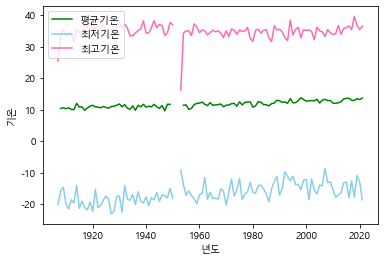

In [10]:
year = seoul_temp['년도']
temp_mean = seoul_temp['평균기온']
temp_min = seoul_temp['최저기온']
temp_max = seoul_temp['최고기온']

plt.xlabel('년도')
plt.ylabel('기온')

plt.plot(year, temp_mean, color='green', label='평균기온')
plt.plot(year, temp_min, color='skyblue', label='최저기온')
plt.plot(year, temp_max, color='hotpink', label='최고기온')

plt.legend()
plt.show()

In [14]:
seoul_temp_new = seoul_temp.dropna()
seoul_temp_new

,년도,지점,평균기온,최저기온,최고기온
1,1908,108,10.4,-15.8,33.6
2,1909,108,10.6,-14.6,35.6
3,1910,108,10.3,-19.9,33.3
4,1911,108,10.6,-21.5,34.5
5,1912,108,10.1,-18.6,34.0
...,...,...,...,...,...
110,2017,108,13.0,-12.6,35.4
111,2018,108,12.9,-17.8,39.6
112,2019,108,13.5,-10.9,36.8
113,2020,108,13.2,-12.9,35.4


In [16]:
data_input = np.array(seoul_temp_new['년도'])
data_target = np.array(seoul_temp_new['평균기온'])

data_input = data_input.reshape(-1, 1)

print(data_input.shape, data_target.shape)

(110, 1) (110,)


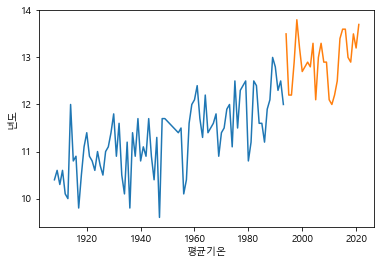

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_input, data_target, shuffle = False)

plt.xlabel('평균기온')
plt.ylabel('년도')

plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(model_lr.predict([[2032]]))

[12.92499228]


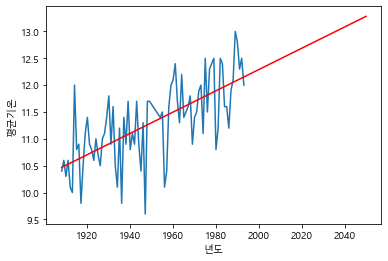

In [22]:
x_line = np.arange(1908, 2051).reshape(-1, 1)
y_line = model_lr.predict(x_line)

plt.xlabel('년도')
plt.ylabel('평균기온')

plt.plot(x_train, y_train)
plt.plot(x_line, y_line, "r")
plt.show()

In [30]:
temp_predict = y_line[-29:]
print(temp_predict)

[12.72692235 12.74672934 12.76653633 12.78634333 12.80615032 12.82595732
 12.84576431 12.8655713  12.8853783  12.90518529 12.92499228 12.94479928
 12.96460627 12.98441327 13.00422026 13.02402725 13.04383425 13.06364124
 13.08344823 13.10325523 13.12306222 13.14286922 13.16267621 13.1824832
 13.2022902  13.22209719 13.24190418 13.26171118 13.28151817]


In [36]:
for year in range(2022, 2051):
    print('%d년의 평균 기온 : %.2f' %(year, temp_predict[year - 2022]))

2022년의 평균 기온 : 12.73
2023년의 평균 기온 : 12.75
2024년의 평균 기온 : 12.77
2025년의 평균 기온 : 12.79
2026년의 평균 기온 : 12.81
2027년의 평균 기온 : 12.83
2028년의 평균 기온 : 12.85
2029년의 평균 기온 : 12.87
2030년의 평균 기온 : 12.89
2031년의 평균 기온 : 12.91
2032년의 평균 기온 : 12.92
2033년의 평균 기온 : 12.94
2034년의 평균 기온 : 12.96
2035년의 평균 기온 : 12.98
2036년의 평균 기온 : 13.00
2037년의 평균 기온 : 13.02
2038년의 평균 기온 : 13.04
2039년의 평균 기온 : 13.06
2040년의 평균 기온 : 13.08
2041년의 평균 기온 : 13.10
2042년의 평균 기온 : 13.12
2043년의 평균 기온 : 13.14
2044년의 평균 기온 : 13.16
2045년의 평균 기온 : 13.18
2046년의 평균 기온 : 13.20
2047년의 평균 기온 : 13.22
2048년의 평균 기온 : 13.24
2049년의 평균 기온 : 13.26
2050년의 평균 기온 : 13.28


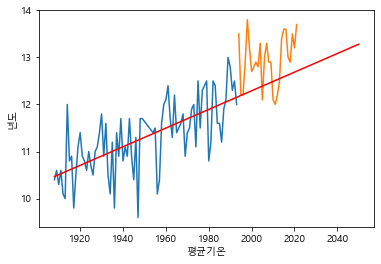

In [37]:
plt.xlabel('평균기온')
plt.ylabel('년도')

plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

plt.plot(x_line, y_line, "r")
plt.show()

In [38]:
print(model_lr.score(x_test, y_test))

-0.8537483850168142
